# Predicting Heart Disease using Machine Learning


1. Problem Definition
2. Data 
3. Evaluation
4. Modelling
5. Hyperparameter Tuning
6. Prediction
7. Experimentation


##  Features
* age 
* gender   (1 = male; 0 = female)
* cp       (chest pain)
* trestbps (resting blood pressure)
* chol     (cholestoral)
* fbs      (fasting blood sugar)
* restecg  (resting electrocardiographic results)
* thalach  (maximum heart rate achieved)
* exang    (exercise induced angina (1 = yes; 0 = no))
* oldpeak  (ST depression induced by exercise relative to rest)
* slope    (the slope of the peak exercise ST segment)
* ca       (number of major vessels (0-3) colored by flourosopy)
* thal     (3 = normal; 6 = fixed defect; 7 = reversable defect)
* num      (diagnosis of heart disease (angiographic disease status))
* target   (1 = yes; 0 = no)


## 1. Problem Definition
Given a list of data of patients from hospital and we have to detect whether the patient has heart disease or not ?

## 2. Data
Data can be downloaded from UCI REPORTS https://archive.ics.uci.edu/ml/datasets/Heart+Disease OR FROM KAGGLE https://www.kaggle.com/ronitf/heart-disease-uci 

## 3. Evaluation
Plot the contribution of each independent feature to the Target value

## 4. Modeling
Choose an appropirate model for our data set 

## 5. Prediction
Check if our model is giving atleast 95% accuracy on training set or not , 
if >= 95% then continue
else check our choosen model

## 6. Experimentation
Check our model on different data set of values and check accuracy in each case



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# plots inside notebook
%matplotlib inline

# Models from Scikit - Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Total patients with symptoms of heart disease using pre-determined data list
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# Evaluate Data

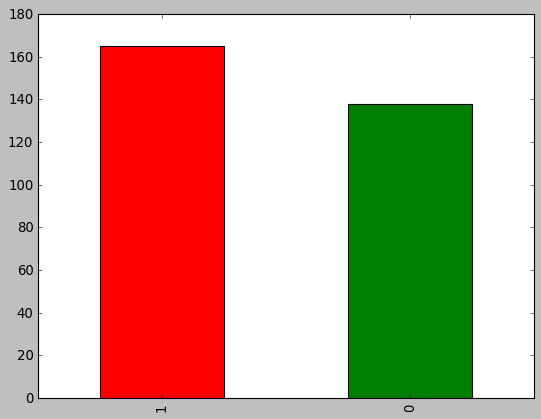

In [5]:
# plot the list in form of bar graph
plt.style.use('classic') 
df["target"].value_counts().plot(kind="bar" , color=["red" , "green"]);

In [6]:
# no empty values in data list
df.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# compare target with gender column
pd.crosstab(df.target,df.gender)

gender,0,1
target,,
0,24,114
1,72,93


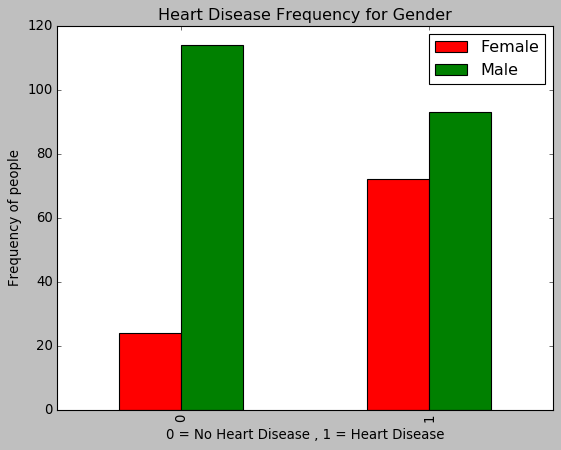

In [9]:
# Plot the same
pd.crosstab(df.target,df.gender).plot(kind="bar" , color=["red","green"]);
plt.title("Heart Disease Frequency for Gender");
plt.xlabel("0 = No Heart Disease , 1 = Heart Disease")
plt.ylabel("Frequency of people")
plt.legend(["Female","Male"]);

## Age Vs Max Heart Rate for Heart Diseases

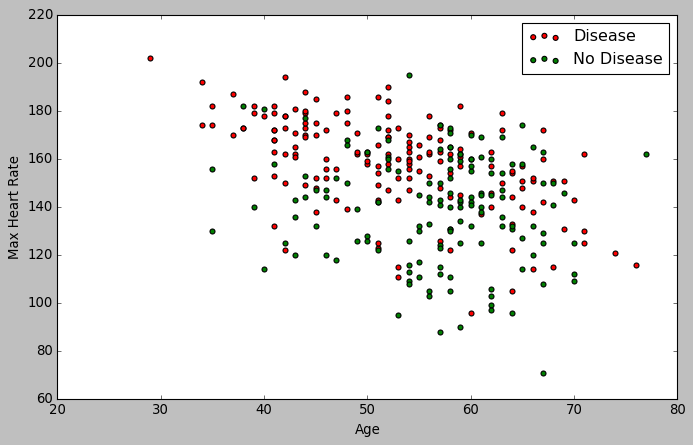

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="Red");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="Green");
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

# Modelling

## Going to try 3 different models
1.  LogisticRegression
2.  KNeighborsClassifier
3.  RandomForestClassifier

In [11]:
# set x(all features) and y(target(heart disease or not))
x = df.drop("target" , axis=1)
y = df["target"]

In [12]:
# split data into train and test
np.random.seed(0)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
len(x_train) , len(x_test)

(242, 61)

In [14]:
# creating dictionary for analysing which model best fits to out data set
models = { "Logistic Regression" : LogisticRegression(max_iter=1000),
           "KNN" : KNeighborsClassifier(),
           "Random Forest" : RandomForestClassifier() }

def fit_and_score(x_train,x_test,y_train,y_test):
    #np.random.seed(0)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [15]:
model_scores = fit_and_score(x_train,x_test,y_train,y_test) 
print(model_scores)

{'Logistic Regression': 0.8524590163934426, 'KNN': 0.639344262295082, 'Random Forest': 0.8524590163934426}


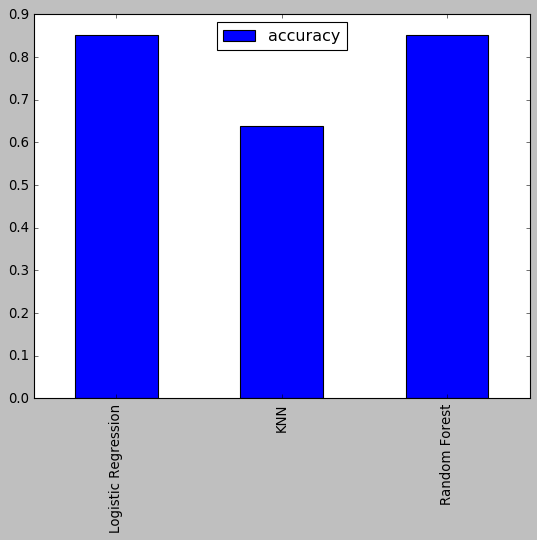

In [16]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning

## 1. Tuning  KNeighborsClassifier()
Randomly changing values of n_neighbor parameter of KNeighborsClassifier() to get best output for our model 

In [17]:
train_scores = []
test_scores  = []

neighbors = range ( 1,21 )

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

Maximum KNN score on test data : 72.13 


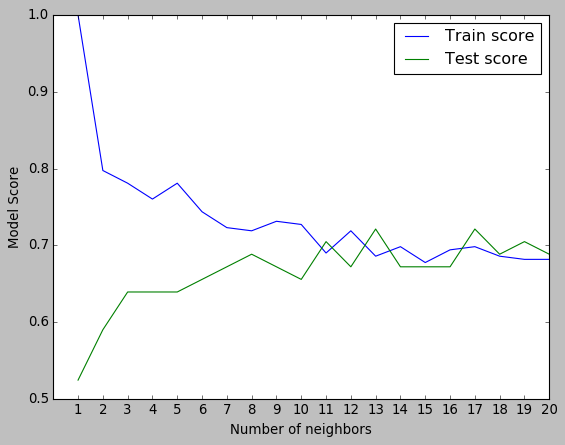

In [18]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on test data : { max(test_scores)*100:.2f} ")

In [19]:
print(np.arange(2,22,1))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


## 2. Tuning  RandomForestClassifier() and LogisticRegression()

In [20]:
# create a hyperparameter grid (map) for Logistic Regression 
log_grid = { "C" : np.logspace(-4,4,20) , 
             "solver" : ["liblinear"]   }
# create a hyperparameter grid (map) for RandomForest Classifier 
rf_grid  = { "n_estimators" : np.arange(10,1000,50) , 
             "max_depth" : [None,3,5,10] ,
             "min_samples_split" : np.arange(2,20,2) ,
             "min_samples_leaf" : np.arange(1,20,2) }

## Randomized Search CV

In [21]:
# Now we have created the grid , lets tune them using Randomised Search CV ...
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression 
log_hyp = RandomizedSearchCV (LogisticRegression(),param_distributions=log_grid,cv=5,n_iter=20,verbose=True)
log_hyp.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [22]:
log_hyp.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [23]:
log_hyp.score(x_test,y_test)

0.8524590163934426

In [24]:
# Setup random hyperparameter search for Random Forest Classifier 
rf_hyp = RandomizedSearchCV (RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rf_hyp.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


In [25]:
rf_hyp.best_params_

{'n_estimators': 110,
 'min_samples_split': 12,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [26]:
rf_hyp.score(x_test,y_test)

0.8688524590163934

In [27]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

## Grid Search CV
Since the score is same for Logistic Regression so we will tune it using Grid Searh CV

In [28]:
# create a hyperparameter grid (map) for Logistic Regression 
log_grid = { "C" : np.logspace(-4,4,20) , 
             "solver" : ["liblinear"]   }

log_gs =  GridSearchCV(LogisticRegression(),param_grid=log_grid,cv=5,verbose=True)
log_gs.fit(x_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [29]:
log_gs.score(x_test,y_test) , log_gs.best_params_ 

(0.8524590163934426, {'C': 1.623776739188721, 'solver': 'liblinear'})

In [30]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

# Predictions
* ROC AND AUC curve
* Confusion matrix
* Classification Report
* Precision , Recall and F1-score

In [31]:
y_preds = rf_hyp.predict(x_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [33]:
# 0 = Right prediction  1,-1 = Wrong preediction
(y_preds-y_test).value_counts()

 0    53
 1     5
-1     3
Name: target, dtype: int64

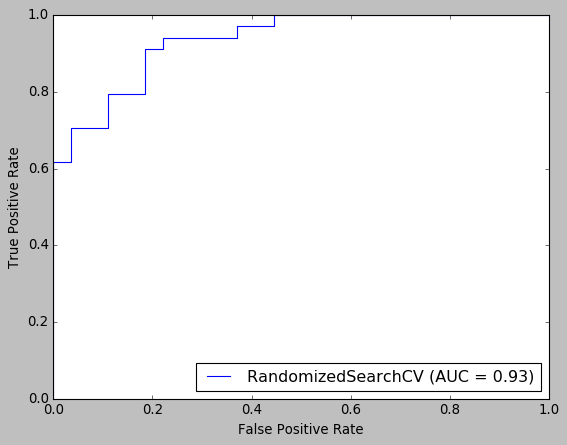

In [34]:
# plotting the predictions using 
# 1. ROC curve
plot_roc_curve(rf_hyp,x_test,y_test)

In [35]:
# 2. Confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[22,  5],
       [ 3, 31]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix')

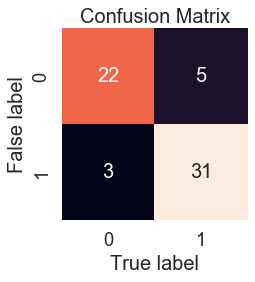

In [36]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_mat,annot=True,cbar=False)
plt.xlabel("True label")
plt.ylabel("False label")
plt.title("Confusion Matrix")

In [37]:
# 3. Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



# Experimentation
Cross Validation on 5 sets ( 20% , 20% , 20% , 20% , 20% ) 

In [38]:
# Check best hyperparameter
rf_hyp.best_params_

{'n_estimators': 110,
 'min_samples_split': 12,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [39]:
# Create new model with best params
mdl = RandomForestClassifier(n_estimators=110,min_samples_split=12,min_samples_leaf=17,max_depth=3)

In [40]:
# Cross validated Accuracy
cv_acc = cross_val_score (mdl,x,y,cv=5,scoring="accuracy")
# Cross validated Precision
cv_pre = cross_val_score (mdl,x,y,cv=5,scoring="precision")
# Cross validated Recall
cv_rec = cross_val_score (mdl,x,y,cv=5,scoring="recall")
# Cross validated f1-score
cv_f1  = cross_val_score (mdl,x,y,cv=5,scoring="f1")

cv_map = pd.DataFrame({ "Accuracy" : cv_acc , "Precision" : cv_pre , "Recall" : cv_rec , "F1 score" : cv_f1} , index={1,2,3,4,5})
cv_map

,Accuracy,Precision,Recall,F1 score
1,0.819672,0.794872,0.878788,0.840580
2,0.901639,0.906250,0.909091,0.911765
3,0.836066,0.818182,0.818182,0.835821
4,0.866667,0.885714,0.909091,0.898551
5,0.750000,0.717949,0.878788,0.800000


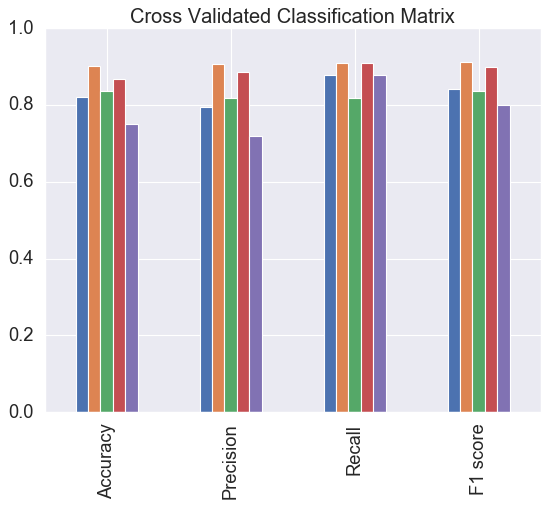

In [41]:
cv_map.T.plot(kind="bar" , legend=False , title="Cross Validated Classification Matrix")